# CS786: Assignment 2
**Abhimanyu Sethia** 

190023, sethia@iitk.ac.in



## Question 1
Without using any third-party libraries or toolboxes, write code to

(a) take any three variable Boolean function as input

(b) generate training examples for this Boolean function

(c) train a neural network to learn this Boolean function, and

(d) verify that the function has been learned, for five separate Boolean functions

In [ ]:
import numpy as np
# generateBooleanFunction() -> creates a new Boolean function, by returning the corresponding truth table

def generateBooleanFunction():
  keys = [(0,0,0) , (1,0,0) , (0,1,0) , (0,0,1) , (0,1,1) , (1,0,1) , (1,1,0) , (1,1,1)]
  truthTable = {}
  for k in keys:
    if (np.random.uniform()<=0.5):
        truthTable[k] = 0
    else:
        truthTable[k] = 1
  
  return truthTable

### Generating Training Data

In [ ]:
# generateTrainingData(truthTable) -> takes in a Boolean function as input (in form of truthTable) and returns input and target output values

def generateTrainingData(truthTable):    
    train_input = np.array([[0,0,0] , [1,0,0] , [0,1,0] , [0,0,1] , [0,1,1] , [1,0,1] , [1,1,0] , [1,1,1]])
    train_output = np.zeros((8,1),dtype=np.int8)
    for i in range(8):
      train_output[i] = truthTable[tuple(train_input[i])]
    
    return train_input, train_output

### Training a Neural Network
We trained a two layered neural network with 'n' number of neurons in the second layer 


In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_der(x):
  return sigmoid(x)*(1-sigmoid(x))

In [ ]:
'''
trainNetwork(input_values, output_values, n, no_of_epochs=10000, rate = 0.5) -> trains 2 layered neural network with parameters:
 n: number of neurons in second layer
 train_input, train_output: training data
 rate: learning rate
 no_of_epochs: number of epochs  
'''
def trainNetwork(train_input, train_output, n, no_of_epochs, rate):

  #initialising weights
  W1 = np.random.rand(3,n)
  W2 = np.random.rand(n, 1)
  b1 = np.zeros((1, n))
  b2 = np.zeros((1,1))

  loss_vs_epoch = []
  for epoch in range(no_of_epochs):
    
    #feedforwarding
    inputs = train_input
    Z1 = np.dot(inputs, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    outputs = sigmoid(Z2)

    #calculating loss
    loss = ((outputs - train_output)**2).sum()/2
    loss_vs_epoch.append(loss)

    #backpropagation
    dloss_dout = outputs-train_output
    dout_dZ2 = sigmoid_der(outputs)
    dZ2_dW2 = A1.T
    
    dW2 = np.dot(dZ2_dW2, dloss_dout*dout_dZ2)
    db2 = dloss_dout*dout_dZ2

    dW1 = np.dot(train_input.T,  (np.dot((outputs-train_output) * sigmoid_der(outputs), W2.T) * sigmoid_der(A1)))
    db1 = np.dot((outputs-train_output) * sigmoid_der(outputs), W2.T) * sigmoid_der(A1)

    W1 -= rate*dW1
    W2 -= rate*dW2
    for i in db2:
      b2 -= rate*i
    for i in db1:
      b1 -= rate*i
  
  return W1, W2, b1, b2, loss_vs_epoch

In [ ]:
# Q1 (a), (b) and (c)

truthTable = generateBooleanFunction() # generate a three variable Boolean Function
train_input, train_output = generateTrainingData(truthTable) # generate training examples for this Boolean function
W1, W2, b1, b2, loss_vs_epoch = trainNetwork(train_input, train_output, 10, 10000, 0.5) # train neural network to learn Boolean function

#comparing model's output and real output values
Z1 = np.dot(train_input, W1) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2) + b2
model_output = sigmoid(Z2)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(model_output)
print(train_output)

[[0.502]
 [0.500]
 [0.501]
 [0.501]
 [0.499]
 [0.499]
 [0.500]
 [0.498]]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]]


### Verifying that the function has been learnt
(for 5 randomly created Boolean functions)

In [ ]:
for i in range(5):
    truthTable = generateBooleanFunction() # generate a three variable Boolean Function
    train_input, train_output = generateTrainingData(truthTable) # generate training examples for this Boolean function
    W1, W2, b1, b2, loss_vs_epoch = trainNetwork(train_input, train_output, 10, 10000, 0.5) # train neural network to learn Boolean function
    Z1 = np.dot(train_input, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    model_output = sigmoid(Z2)
    print("Boolean Function #"+str(i+1)+'\n')
    print("LEARNED VALUES: \n")
    print(model_output)
    print('\n')
    print("TARGET VALUES: \n")
    print(train_output)
    print('\n')
    print("Final loss: "+str(loss_vs_epoch[-1])+'\n')
    

Boolean Function #1

LEARNED VALUES: 

[[0.025]
 [0.994]
 [0.976]
 [0.976]
 [0.013]
 [0.997]
 [0.997]
 [0.010]]


TARGET VALUES: 

[[0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]]


Final loss: 0.0010715076819925306

Boolean Function #2

LEARNED VALUES: 

[[1.000]
 [1.000]
 [0.000]
 [1.000]
 [1.000]
 [1.000]
 [0.000]
 [1.000]]


TARGET VALUES: 

[[1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]]


Final loss: 2.191004250715251e-07

Boolean Function #3

LEARNED VALUES: 

[[0.000]
 [0.000]
 [0.000]
 [0.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]]


TARGET VALUES: 

[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]]


Final loss: 2.2046297596023493e-07

Boolean Function #4

LEARNED VALUES: 

[[0.987]
 [0.013]
 [1.000]
 [1.000]
 [0.012]
 [0.000]
 [0.000]
 [0.982]]


TARGET VALUES: 

[[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]]


Final loss: 0.0004045737024091787

Boolean Function #5

LEARNED VALUES: 

[[0.993]
 [0.006]
 [0.999]
 [0.999]
 [0.008]
 [0.000]
 [0.000]
 [0.991]]


TARGET VALUES: 

[[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [

## Question 2
Without using any third-party libraries or toolboxes, write code to

(a) generate a random instance of the frozen lake scenario given two inputs - the size of the lake (N)
assuming its square, and the number of holes (M).

(b) implement a Q-learning agent to find a path through the lake to the goal. Report the results of
the learning algorithm by plotting episode count on the x-axis and total reward received by the
agent within an episode on the y-axis

(c) identify how learning performance changes when you change the parameters α and λ in your
algorithm

(d) identify how learning performance changes with respect to changes in N and M.

### Creating the frozenLake class

In [ ]:
class frozenLake:
  def __init__(self, N, M, hole_reward, goal_reward):
    self.size = N
    self.holes = M
    self.hole_reward = hole_reward
    self.goal_reward = goal_reward
    self.lake = self.generateLake()
    self.rewards = self.getRewards() 

  # generateLake-> generates a frozen lake, with parameters, size = size of the lake and holes = number of holes
  def generateLake(self):
    size = self.size
    holes= self.holes

    lake = np.empty((size,size),dtype=str)
    #generating random hole indices
    hole_indices = np.random.choice(np.arange(1,size**2-1),holes,replace=False) #selecting indices at random
    for i in range(size**2):
        if i in hole_indices:
            lake[i//size][i%size] = 'H'
        else:
            lake[i//size][i%size] = 'F'
    lake[0][0] = 'S'
    lake[size-1][size-1] = 'G'
    return lake
  
  #getRewards -> gives rewards for the generated lake
  def getRewards(self):
    lake= self.lake
    rewards = (lake == 'H')*(self.hole_reward)
    rewards[-1][-1] = self.goal_reward
    return rewards
  
  #printLake -> prints the lake using matplotlib
  def printLake(self):
    print(self.lake)
    rewards = self.rewards
    img = rewards + 100
    img[0][0] = img[-1][-1]
    plt.imshow(img, cmap='gray', vmin=0, vmax=255) 
    return img

  #getActions -> returns the list of valid actions from a given state  
  '''
  0 -> left
  1 -> up
  2 -> right
  3 -> down
  '''
  def getActions(self, state):

    size = self.size
    valid_actions = [0,1,2,3]
    if state[0] == 0:
        valid_actions.remove(1)
    if state[1] == 0:
        valid_actions.remove(0)
    if state[0] == size-1:
        valid_actions.remove(3)
    if state[1] == size-1:
        valid_actions.remove(2)
    
    return valid_actions

  #getState -> returns state after taking action from given state
  def getState(self, state, action):
      
      new_state = [0,0]
      #left
      if action == 0:
          new_state[0] = state[0]
          new_state[1] = state[1]-1
      #up
      if action == 1:
          new_state[0] = state[0]-1
          new_state[1] = state[1]
      #right
      if action == 2:
          new_state[0] = state[0]
          new_state[1] = state[1]+1
      #down
      if action == 3:
          new_state[0] = state[0]+1
          new_state[1] = state[1]

      return new_state


### Generating a random instance of frozen lake

[['S' 'H' 'F' 'H' 'F' 'F' 'F' 'H' 'F' 'F']
 ['H' 'F' 'F' 'F' 'F' 'H' 'H' 'H' 'F' 'F']
 ['H' 'F' 'H' 'F' 'F' 'H' 'H' 'F' 'F' 'H']
 ['F' 'H' 'F' 'F' 'F' 'F' 'H' 'H' 'H' 'F']
 ['F' 'H' 'H' 'H' 'F' 'F' 'H' 'F' 'F' 'H']
 ['F' 'F' 'F' 'F' 'H' 'F' 'H' 'F' 'F' 'H']
 ['F' 'F' 'H' 'F' 'F' 'H' 'H' 'H' 'F' 'F']
 ['F' 'F' 'F' 'F' 'H' 'F' 'F' 'F' 'F' 'F']
 ['F' 'H' 'F' 'F' 'H' 'H' 'F' 'F' 'F' 'F']
 ['F' 'H' 'F' 'H' 'F' 'F' 'H' 'F' 'F' 'G']]


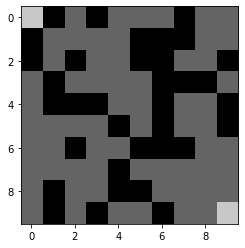

In [ ]:
import matplotlib.pyplot as plt
N = 10 #size
M= 35  #number of holes
lake_instance = frozenLake(N,M,-100,100)
img = lake_instance.printLake()

### Implementing the Q Learning function

In [ ]:
# Q_learning() -> returns Q, reward_list and avg_reward_list
def Q_learning(lake_instance, no_of_episodes, alpha, l, epsilon_max, epsilon_min, decay_rate, max_steps):
    reward_list = []
    avg_reward_list = []
    rewards = lake_instance.rewards
    size = len(rewards)
    Q = np.random.rand(size,size,4)
    epsilon = epsilon_max
    reward_avg = 0
    avg_interval = 500
    for episode in range(no_of_episodes):
        state = [0,0]
        cum_reward = 0
        steps = 0
    
        if episode % 100 == 99: #updating epsilon after every 100th step
            epsilon *= decay_rate
            epsilon = max(epsilon, epsilon_min)

        while state != [len(rewards)-1,len(rewards)-1] and steps <= max_steps:
            valid_actions = lake_instance.getActions(state)
            if np.random.uniform(0, 1) < epsilon:
                action = np.random.choice(valid_actions)
            else:
                maxm = float('-inf')
                for j in valid_actions:
                    if Q[state[0]][state[1]][j] > maxm:
                        action = j
                        maxm = Q[state[0]][state[1]][j]

            new_state = lake_instance.getState(state, action)
    
            old_value = Q[state[0], state[1], action]
            next_max = np.max(Q[new_state[0]][new_state[1]])
    
            reward = rewards[new_state[0]][new_state[1]]
            new_value = (1 - alpha) * old_value + alpha * (reward + l * next_max)

            Q[state[0], state[1], action] = new_value
            state = new_state
            cum_reward += reward
            steps += 1
  
        reward_list.append(cum_reward)
        reward_avg += cum_reward

        if episode%avg_interval == 0 and episode!= 0:
            print("Episode "+str(episode)+" Avg Reward: "+str(reward_avg/avg_interval))
            avg_reward_list.append(reward_avg/avg_interval)
            reward_avg = 0
    
    return Q, reward_list, avg_reward_list 

In [ ]:
# optimal_policy() -> finds the optimal policy, returns corresponding sequence of actions, favoured action and path img
def optimal_policy(lake_instance, Q ):
    size = lake_instance.size
    rewards = lake_instance.rewards
    path_img = rewards+100
    path_img[0][0] = 200
    favoured_action = np.zeros((size,size), dtype=int)
    for i in range(Q.shape[0]):
        for j in range(Q.shape[1]):
            favoured_action[i][j] = int(np.argmax(Q[i][j]))
  
    state = [0, 0]
    seq_actions = []
    while state != [size-1, size-1]:
        if favoured_action[state[0], state[1]] == 0:
            seq_actions.append('left')
        if favoured_action[state[0], state[1]] == 1:
            seq_actions.append('up')
        if favoured_action[state[0], state[1]] == 2:
            seq_actions.append('right')
        if favoured_action[state[0], state[1]] == 3:
            seq_actions.append('down')

        state = lake_instance.getState(state, favoured_action[state[0], state[1]])
        path_img[state[0], state[1]] = 200

    return seq_actions, favoured_action, path_img

In [ ]:
Q, reward_list, avg_reward_list =  Q_learning(lake_instance, 10000, 0.8, 0.9, 0.9, 0.01, 0.9, 100)
seq_actions, favoured_action, path_img = optimal_policy(lake_instance ,Q)

Episode 500 Avg Reward: -2601.2
Episode 1000 Avg Reward: -1729.8
Episode 1500 Avg Reward: -1436.2
Episode 2000 Avg Reward: -1388.2
Episode 2500 Avg Reward: -1803.4
Episode 3000 Avg Reward: -2438.4
Episode 3500 Avg Reward: -3271.4
Episode 4000 Avg Reward: -3818.2
Episode 4500 Avg Reward: -4223.4
Episode 5000 Avg Reward: -4309.0
Episode 5500 Avg Reward: -4390.0
Episode 6000 Avg Reward: -4332.6
Episode 6500 Avg Reward: -4347.8
Episode 7000 Avg Reward: -4387.2
Episode 7500 Avg Reward: -4387.4
Episode 8000 Avg Reward: -4474.2
Episode 8500 Avg Reward: -4313.0
Episode 9000 Avg Reward: -4421.4
Episode 9500 Avg Reward: -4254.0


KeyboardInterrupt: ignored

[['S' 'H' 'H' 'F' 'F' 'H' 'F' 'F' 'F' 'H']
 ['F' 'H' 'H' 'H' 'F' 'H' 'F' 'H' 'F' 'F']
 ['H' 'F' 'H' 'H' 'H' 'F' 'F' 'F' 'H' 'F']
 ['F' 'F' 'F' 'F' 'F' 'H' 'F' 'F' 'H' 'H']
 ['F' 'H' 'F' 'F' 'F' 'F' 'F' 'H' 'F' 'H']
 ['F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'H']
 ['H' 'H' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F']
 ['H' 'F' 'H' 'F' 'H' 'H' 'H' 'H' 'H' 'H']
 ['F' 'F' 'F' 'F' 'F' 'F' 'H' 'F' 'F' 'F']
 ['H' 'F' 'F' 'F' 'F' 'F' 'F' 'H' 'H' 'G']]


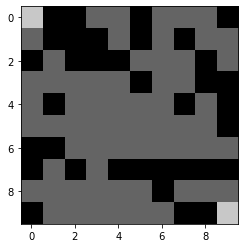

In [ ]:
img = lake_instance.printLake()

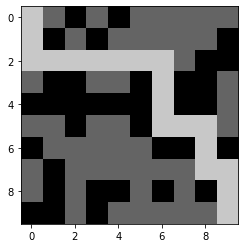

In [ ]:
plt.imshow(path_img, cmap='gray', vmin=0, vmax=255)

### Plotting total rewards received within an episode vs episode count

In [ ]:
# plotRewards(rewards_list) -> plots the total rewards received within an episode on y axis and episode count on x axis
def plotRewards(reward_list):
    plt.figure()
    running_avg = np.convolve(reward_list, np.ones(50)/50) #converting to a smoother graph using running averages over 50 episodes
    plt.plot(running_avg)
    plt.plot(np.zeros((10000,1)))
    plt.xlim(0,10000)
    plt.xlabel("Episode Count")
    plt.ylabel("Total Reward Accumulated")
    plt.title("Rewards vs Episode Count")
    plt.show()

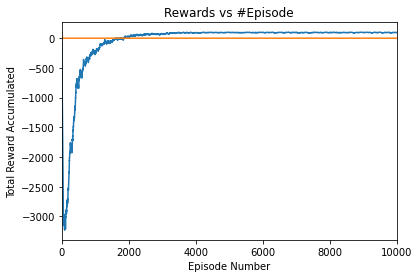

In [ ]:
plot_rewards(reward_list)

### Change in Learning Performance on Changing $\alpha$

In [ ]:
rewards_alpha = []
avg_rewards_alpha = []
for alpha in np.arange(0.1,1,0.1):
    alpha = round(alpha,1)
    print("alpha="+str(alpha))
    Q, reward_list_alpha, avg_reward_list_alpha = Q_learning(lake_instance, 10000, alpha, 0.9, 0.9, 0.01, 0.9, 500)
    avg_rewards_alpha.append(avg_reward_list_alpha)
    rewards_alpha.append(reward_list_alpha)

alpha=0.1
Episode 500 Avg Reward: -2984.2
Episode 1000 Avg Reward: -403.0
Episode 1500 Avg Reward: -96.2
Episode 2000 Avg Reward: -8.0
Episode 2500 Avg Reward: 44.4
Episode 3000 Avg Reward: 69.8
Episode 3500 Avg Reward: 83.0
Episode 4000 Avg Reward: 88.2
Episode 4500 Avg Reward: 95.6
Episode 5000 Avg Reward: 93.0
Episode 5500 Avg Reward: 97.4
Episode 6000 Avg Reward: 95.2
Episode 6500 Avg Reward: 94.8
Episode 7000 Avg Reward: 95.6
Episode 7500 Avg Reward: 96.2
Episode 8000 Avg Reward: 95.0
Episode 8500 Avg Reward: 94.0
Episode 9000 Avg Reward: 95.0
Episode 9500 Avg Reward: 94.8
alpha=0.2
Episode 500 Avg Reward: -2687.8
Episode 1000 Avg Reward: -405.0
Episode 1500 Avg Reward: -85.6
Episode 2000 Avg Reward: 7.6
Episode 2500 Avg Reward: 45.2
Episode 3000 Avg Reward: 71.0
Episode 3500 Avg Reward: 83.6
Episode 4000 Avg Reward: 86.4
Episode 4500 Avg Reward: 95.4
Episode 5000 Avg Reward: 93.0
Episode 5500 Avg Reward: 95.6
Episode 6000 Avg Reward: 96.0
Episode 6500 Avg Reward: 94.2
Episode 700

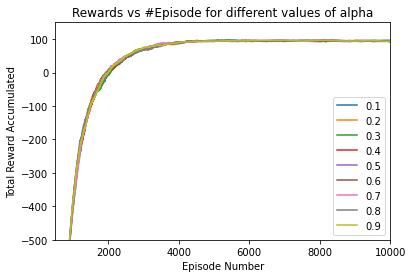

In [ ]:
plt.figure()
for j in range(len(rewards_alpha)):
    running_avg = np.convolve(rewards_alpha[j], np.ones(500)/500)
    plt.plot(running_avg, label=round((j+1)*0.1,1))
plt.xlim(500,10000)
plt.ylim(-500,150)
plt.xlabel("Episode Count")
plt.ylabel("Total Reward Accumulated")
plt.title("Rewards vs Episode Count for different values of alpha")
plt.legend()  
plt.show()

#### Conclusion
Change in $\alpha$ does not bring about any significant change in the learning performance.

### Change in Learning Performance on Changing $\lambda$



In [ ]:
rewards_lambda = []
avg_rewards_lambda = []
for l in np.arange(0.1,1,0.1):
    l = round(l,1)
    print("lambda="+str(l))
    Q, reward_list_lambda, avg_reward_list_lambda = Q_learning(lake_instance, 10000, 0.8, l, 0.9, 0.01, 0.9, 100)
    avg_rewards_lambda.append(avg_reward_list_lambda)
    rewards_lambda.append(reward_list_lambda)

lambda=0.1
Episode 500 Avg Reward: -2415.4
Episode 1000 Avg Reward: -1376.0
Episode 1500 Avg Reward: -1113.6
Episode 2000 Avg Reward: -1140.0
Episode 2500 Avg Reward: -1121.2
Episode 3000 Avg Reward: -924.2
Episode 3500 Avg Reward: -773.0
Episode 4000 Avg Reward: -606.2
Episode 4500 Avg Reward: -432.2
Episode 5000 Avg Reward: -452.0
Episode 5500 Avg Reward: -332.6
Episode 6000 Avg Reward: -404.2
Episode 6500 Avg Reward: -363.2
Episode 7000 Avg Reward: -341.4
Episode 7500 Avg Reward: -367.6
Episode 8000 Avg Reward: -357.4
Episode 8500 Avg Reward: -408.8
Episode 9000 Avg Reward: -358.4
Episode 9500 Avg Reward: -379.4
lambda=0.2
Episode 500 Avg Reward: -2586.6
Episode 1000 Avg Reward: -1620.0
Episode 1500 Avg Reward: -947.6
Episode 2000 Avg Reward: -539.0
Episode 2500 Avg Reward: -299.8
Episode 3000 Avg Reward: -183.2
Episode 3500 Avg Reward: -103.8
Episode 4000 Avg Reward: -62.4
Episode 4500 Avg Reward: -37.0
Episode 5000 Avg Reward: -35.6
Episode 5500 Avg Reward: -32.0
Episode 6000 Avg 

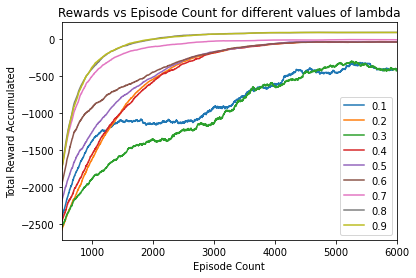

In [ ]:
plt.figure()
for j in range(len(rewards_lambda)):
    running_avg = np.convolve(rewards_lambda[j], np.ones(500)/500)
    plt.plot(running_avg, label=round((j+1)*0.1,1))
plt.xlim(500,6000)
plt.xlabel("Episode Count")
plt.ylabel("Total Reward Accumulated")
plt.title("Rewards vs Episode Count for different values of lambda")
plt.legend()  
plt.show()

#### Conclusion
Varying values of $\lambda$ produces the expected results. For lower values of $\lambda$, we see myopic nature, as a result of which, the accumulated reward is around 0. Myopic nature essentially reduces value of future rewards. 
Contrary to this, for larger values of $\lambda$, the agent successfully learns the optimal path. 

### Change in Learning Performance on Changing N

In [ ]:
N_rewards = []
for N in [4,6,8,10,12,14,16,18]:
  M = round(N*N*0.3)
  lake_instance = frozenLake(N,M,-100,100)
  Q, reward_list, avg_reward_list = Q_learning(lake_instance, 10000, 0.8, 0.9, 0.9, 0.001, 0.9, 500)
  N_rewards.append(reward_list)

Episode 500 Avg Reward: -370.0
Episode 1000 Avg Reward: -30.2
Episode 1500 Avg Reward: 39.4
Episode 2000 Avg Reward: 76.8
Episode 2500 Avg Reward: 84.6
Episode 3000 Avg Reward: 93.6
Episode 3500 Avg Reward: 94.8
Episode 4000 Avg Reward: 97.6
Episode 4500 Avg Reward: 98.8
Episode 5000 Avg Reward: 99.2
Episode 5500 Avg Reward: 99.4
Episode 6000 Avg Reward: 99.4
Episode 6500 Avg Reward: 100.0
Episode 7000 Avg Reward: 99.4
Episode 7500 Avg Reward: 100.0
Episode 8000 Avg Reward: 100.0
Episode 8500 Avg Reward: 99.8
Episode 9000 Avg Reward: 99.8
Episode 9500 Avg Reward: 99.8
Episode 500 Avg Reward: -951.8
Episode 1000 Avg Reward: -97.0
Episode 1500 Avg Reward: 29.0
Episode 2000 Avg Reward: 58.8
Episode 2500 Avg Reward: 76.8
Episode 3000 Avg Reward: 86.8
Episode 3500 Avg Reward: 91.6
Episode 4000 Avg Reward: 95.8
Episode 4500 Avg Reward: 97.6
Episode 5000 Avg Reward: 99.2
Episode 5500 Avg Reward: 99.2
Episode 6000 Avg Reward: 99.6
Episode 6500 Avg Reward: 99.8
Episode 7000 Avg Reward: 99.8
Epi

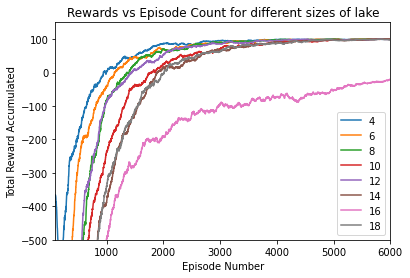

In [ ]:
plt.figure()
for k in range(len(N_rewards)):
    running_avg = np.convolve(N_rewards[k], np.ones(200)/200)
    plt.plot(running_avg, label=4+2*k)
plt.xlabel("Episode Count")
plt.ylabel("Total Reward Accumulated")
plt.title("Rewards vs Episode Count for different sizes of lake")
plt.ylim(-500,150)
plt.xlim(100,6000)
plt.xlabel("Episode Number")
plt.legend()
plt.show()


#### Conclusion:
As N increase, the number of episodes required to learn the optimal policy also increase. This can be explained as larger the size of the lake, larger will be the number of trials required by the agent to learn. The outlier line might be a map wherein there is no way of reaching the goal (since we are generating the lake randomly) 

### Change in Learning Performance on Changing M

In [ ]:
M_rewards=[]
N =6

for M in [3,6,9,12,15,18]:
  lake_instance = frozenLake(N,M,-100,100)
  Q, reward_list, avg_reward_list = Q_learning(lake_instance, 10000, 0.8, 0.9, 0.9, 0.001, 0.9, 500)
  M_rewards.append(reward_list)

Episode 500 Avg Reward: -288.2
Episode 1000 Avg Reward: 0.8
Episode 1500 Avg Reward: 46.4
Episode 2000 Avg Reward: 75.0
Episode 2500 Avg Reward: 88.4
Episode 3000 Avg Reward: 90.8
Episode 3500 Avg Reward: 95.2
Episode 4000 Avg Reward: 98.2
Episode 4500 Avg Reward: 98.2
Episode 5000 Avg Reward: 99.2
Episode 5500 Avg Reward: 99.6
Episode 6000 Avg Reward: 99.6
Episode 6500 Avg Reward: 100.0
Episode 7000 Avg Reward: 99.8
Episode 7500 Avg Reward: 100.0
Episode 8000 Avg Reward: 100.0
Episode 8500 Avg Reward: 100.0
Episode 9000 Avg Reward: 99.8
Episode 9500 Avg Reward: 100.0
Episode 500 Avg Reward: -559.0
Episode 1000 Avg Reward: -59.8
Episode 1500 Avg Reward: 27.6
Episode 2000 Avg Reward: 60.8
Episode 2500 Avg Reward: 73.8
Episode 3000 Avg Reward: 89.0
Episode 3500 Avg Reward: 91.6
Episode 4000 Avg Reward: 94.8
Episode 4500 Avg Reward: 97.6
Episode 5000 Avg Reward: 99.0
Episode 5500 Avg Reward: 99.2
Episode 6000 Avg Reward: 98.6
Episode 6500 Avg Reward: 99.4
Episode 7000 Avg Reward: 99.6
Epi

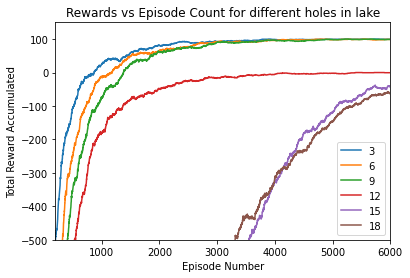

In [ ]:
plt.figure()
for k in range(len(M_rewards)):
    running_avg = np.convolve(M_rewards[k], np.ones(200)/200)
    plt.plot(running_avg, label=3+3*k)
plt.xlabel("Episode Count")
plt.ylabel("Total Reward Accumulated")
plt.title("Rewards vs Episode Count for different holes in lake")
plt.ylim(-500,150)
plt.xlim(200,6000)
plt.xlabel("Episode Count")
plt.legend()
plt.show()


#### Conclusion:
As M increases, the number of episodes required to learn the optimal policy also increase. This can be explained as increased number of holes imply increased possibility of agent falling into a hole, implies requirement of more trials by the agent to learn. 

## Question 3

The Rulkov map is a simple dynamical systems model of neuronal action potentials. 
The model is a coupling of a fast and a slow dynamical system in the following form:

$$ x_{n+1} = f(x_n,y_n) $$
$$ y_{n+1} = y_n - \mu (x_n+1) + \mu\sigma$$

where f() is a discontinuous function of the form

$$ 
f(x,y)=
\begin{cases} 
      \frac{\alpha}{1-x}+y & x\leq 0 \\
      \alpha+y & 0 < x < \alpha+y \\
      -1 & x\geq\alpha+y 
\end{cases}
$$

For some specific parameter choices, this system can reproduce the broad outlines of neuronal 
action potentials, viz. bursts of spikes, tonic spiking and periods of silence.  I would like you to reproduce all three modes of behavior using this model. Hint: read the original paper for clues to appropriate parameter values. I would also like you to empirically demonstrated ranges of parameter values that govern these three different regimes of activity for the neuron model. 

### Defininv rulkovMap class

In [ ]:
class rulkovMap:
  def __init__(self, N, alpha, sigma, mu):
    self.N = N
    self.alpha = alpha
    self.sigma = sigma
    self.mu = mu  
    self.X = np.zeros((1, N))
    self.Y = np.zeros((1, N))

  
  def f(self,n):
    alpha = self.alpha
    X = self.X
    Y = self.Y
    if X[:, n] <= 0:
      return alpha/(1-X[:, n]) + Y[:, n]
    elif (X[:, n] < (alpha + Y[:, n])):
      return alpha + Y[:, n]        
    else:
      return -1


  #calculate_XY -> calculates value of X and Y from the parameters
  def simulateStep(self,n):
    X = self.X
    Y = self.Y
    mu = self.mu
    sigma = self.sigma
    X[:, n+1] = self.f(n)
    Y[:, n+1] = Y[:, n] - mu*(X[:, n] + 1) + mu*sigma

    

### Bursting spikes mode

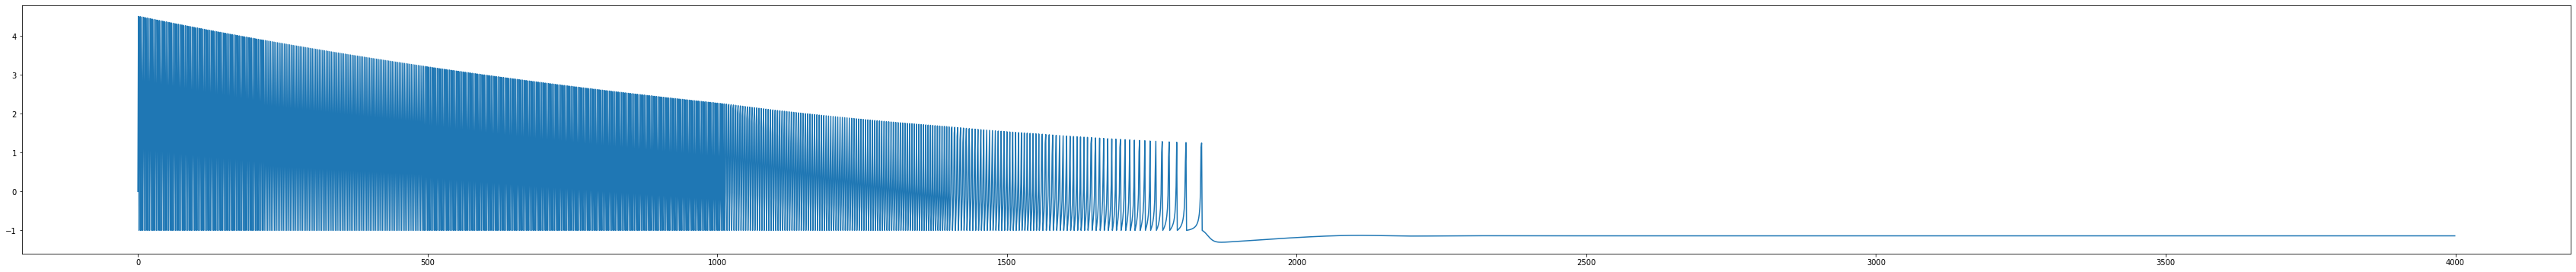

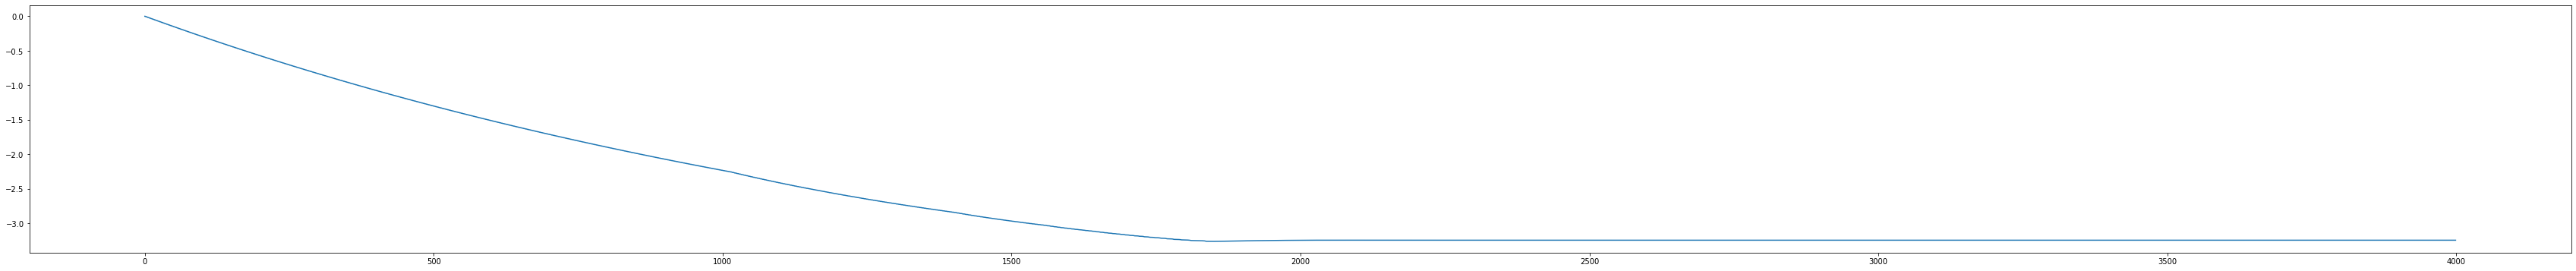

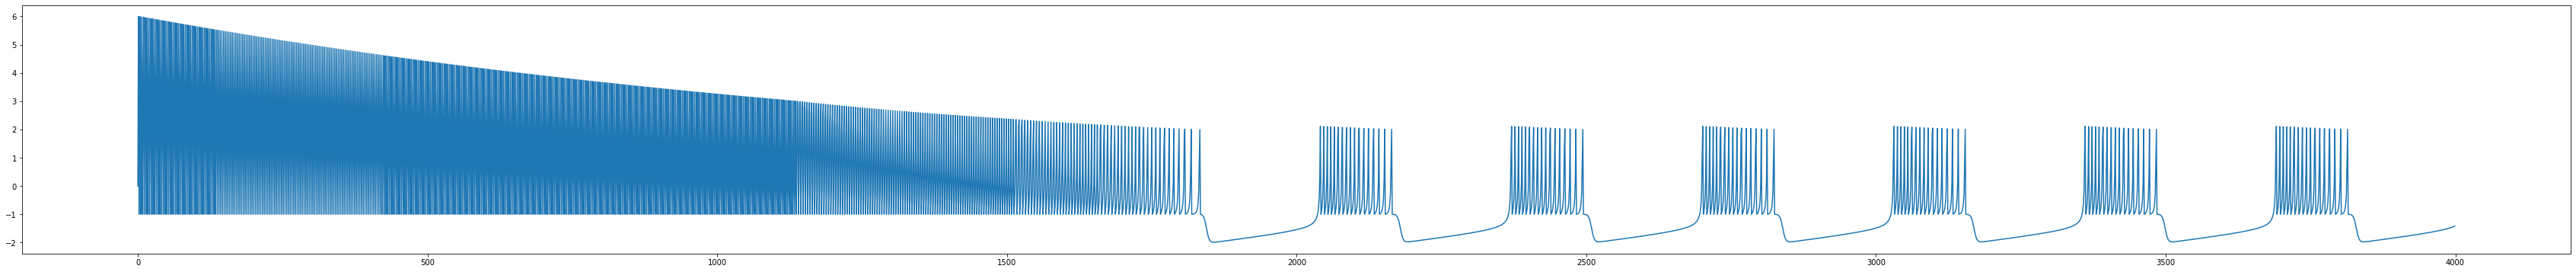

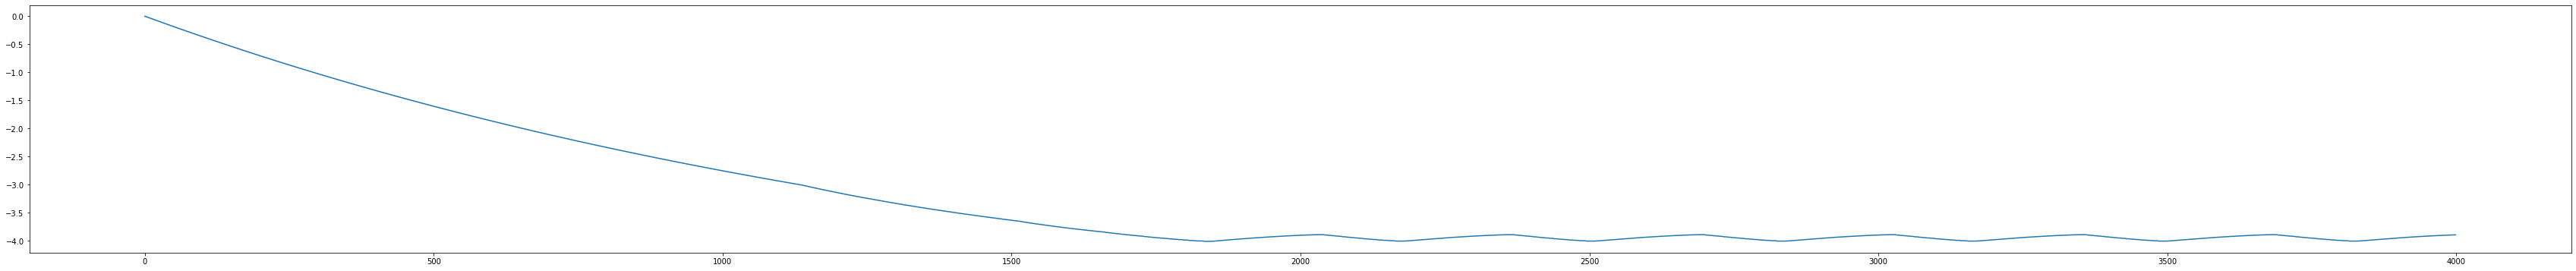

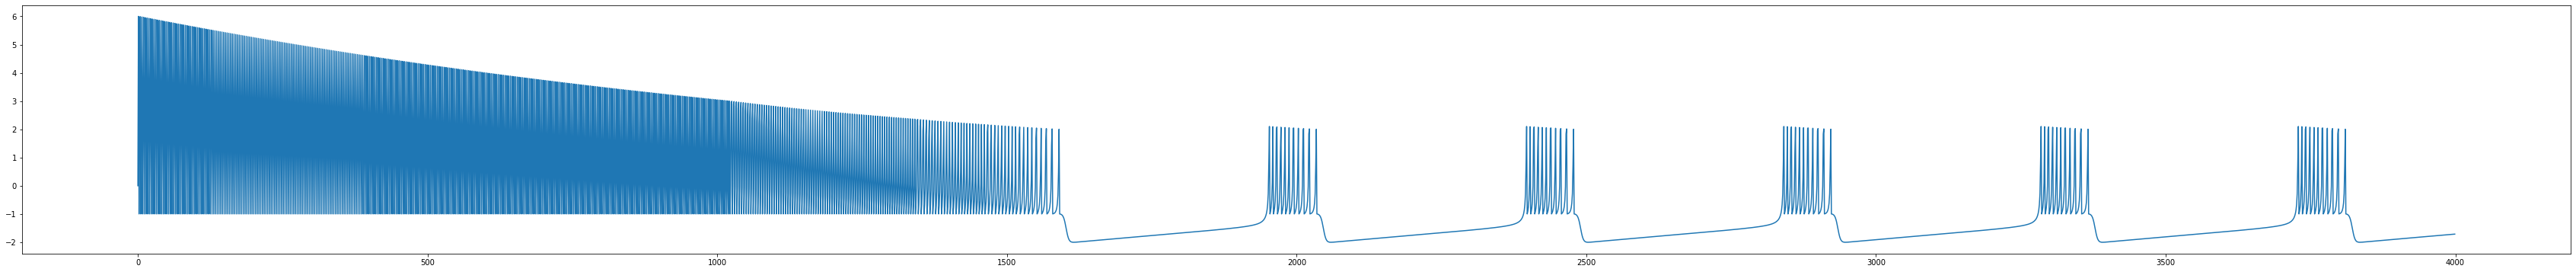

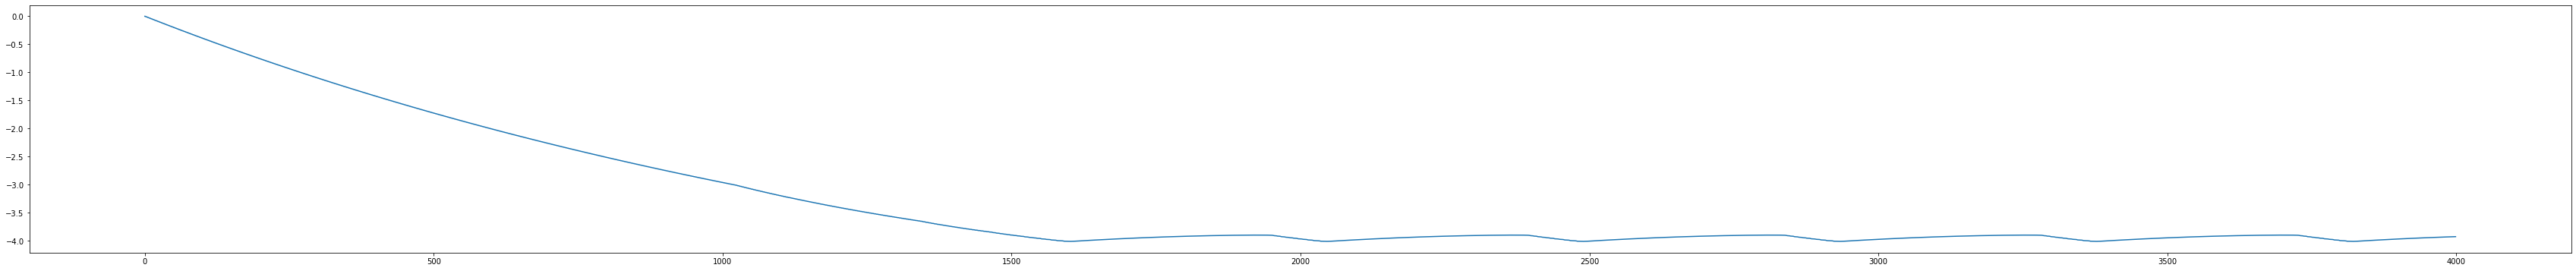

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
N= 4000
#bursting spikes with alpha= 4.5, sigma =-0.14 and mu = 0.001
env = rulkovMap(N, alpha=4.5, sigma=-0.14, mu=0.001)
for i in range(N-1):
    env.simulateStep(i)
plt.figure(figsize=(60, 6)) 
plt.plot(env.X.T)
plt.show()
plt.figure(figsize=(60, 6)) 
plt.plot(env.Y.T)
plt.show()

#bursting spikes with alpha=6, sigma=-0.1 and mu=0.001 
env = rulkovMap(N, alpha=6, sigma=-0.1, mu=0.001)
for i in range(N-1):
    env.simulateStep(i)
plt.figure(figsize=(60, 6)) 
plt.plot(env.X.T)
plt.show()
plt.figure(figsize=(60, 6)) 
plt.plot(env.Y.T)
plt.show()

#bursting spikes with alpha=6.0, sigma=-0.386 and mu=0.001
env = rulkovMap(N, alpha=6.0, sigma=-0.386, mu=0.001)
for i in range(N-1):
    env.simulateStep(i)
plt.figure(figsize=(60, 6)) 
plt.plot(env.X.T)
plt.show()
plt.figure(figsize=(60, 6)) 
plt.plot(env.Y.T)
plt.show()


### Silence mode

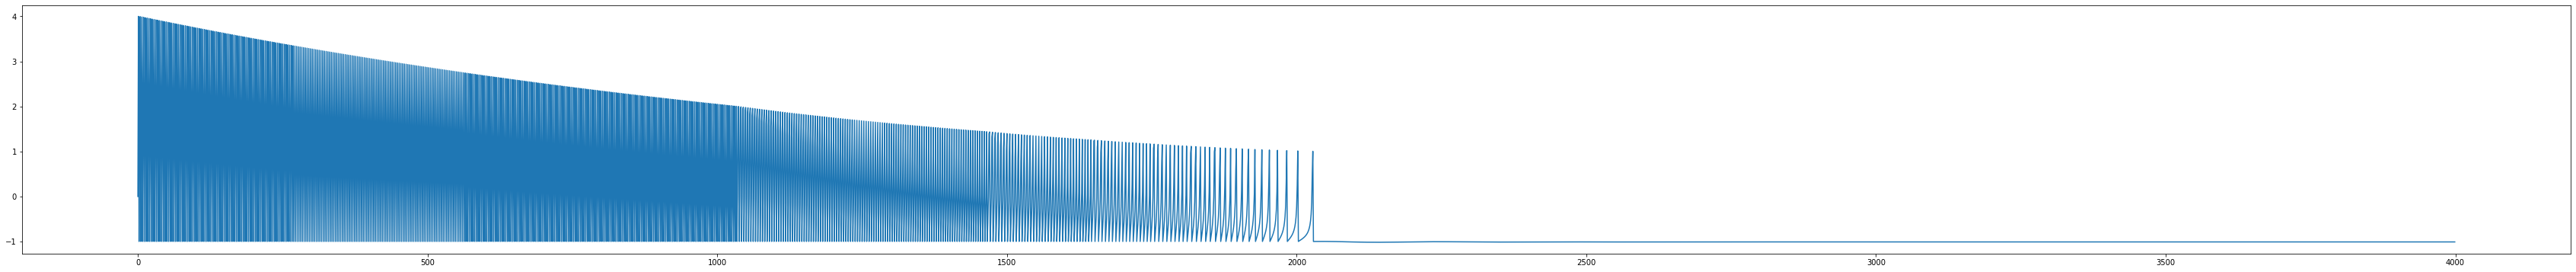

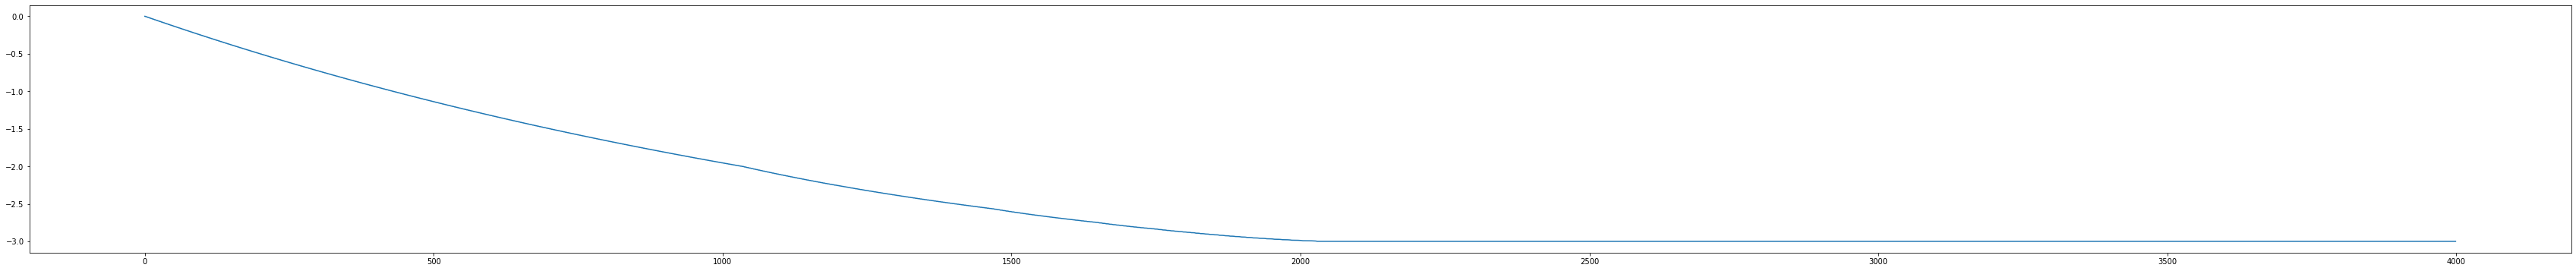

In [ ]:
#silence mode with alpha =4, sigma =-0.01, mu =0.001
env = rulkovMap(N, alpha=4, sigma=-0.01, mu=0.001)
for i in range(N-1):
    env.simulateStep(i)
plt.figure(figsize=(60, 6)) 
plt.plot(env.X.T)
plt.show()
plt.figure(figsize=(60, 6)) 
plt.plot(env.Y.T)
plt.show()




### Tonic Spikes mode


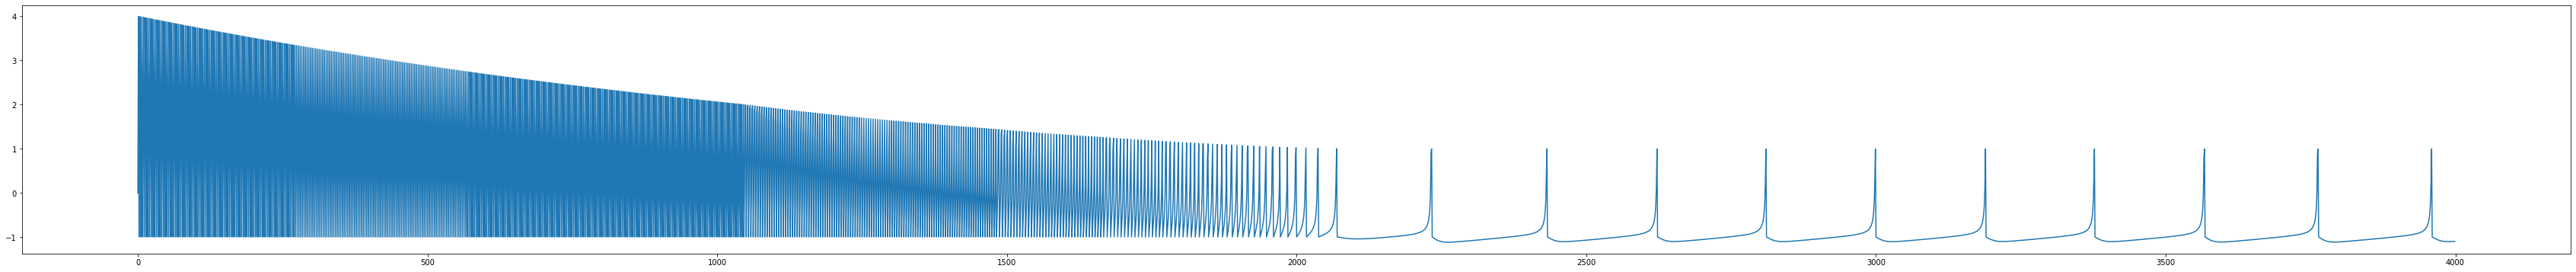

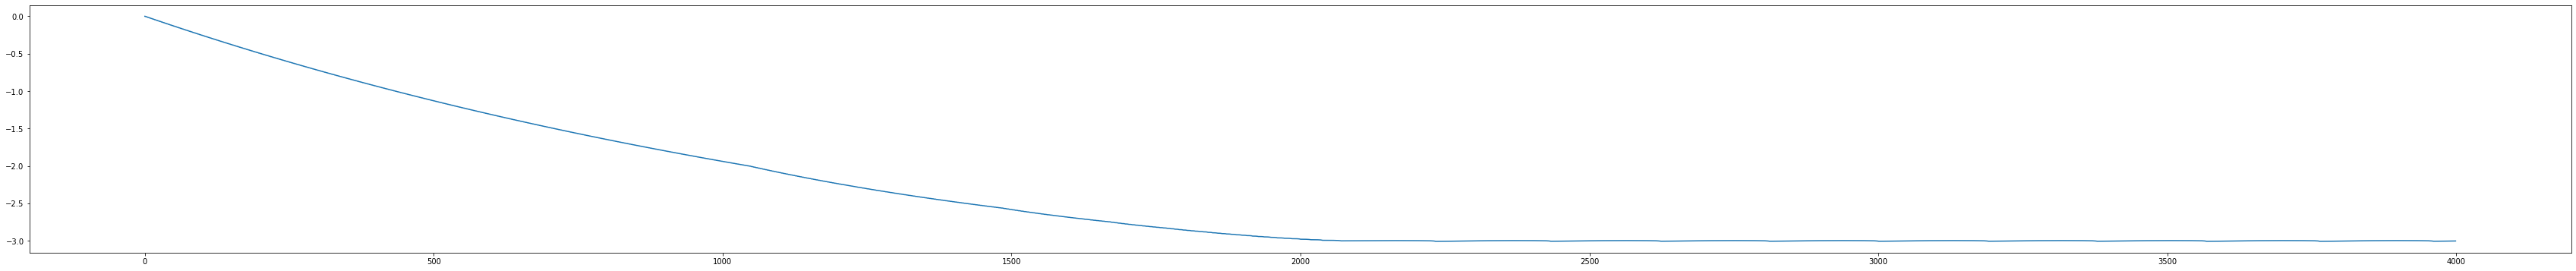

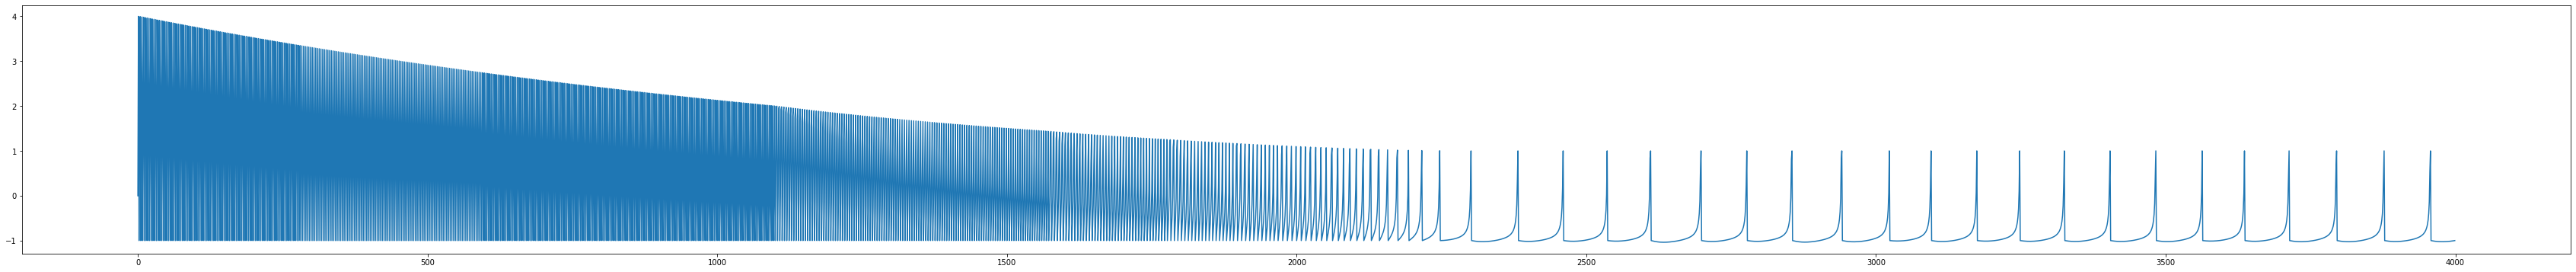

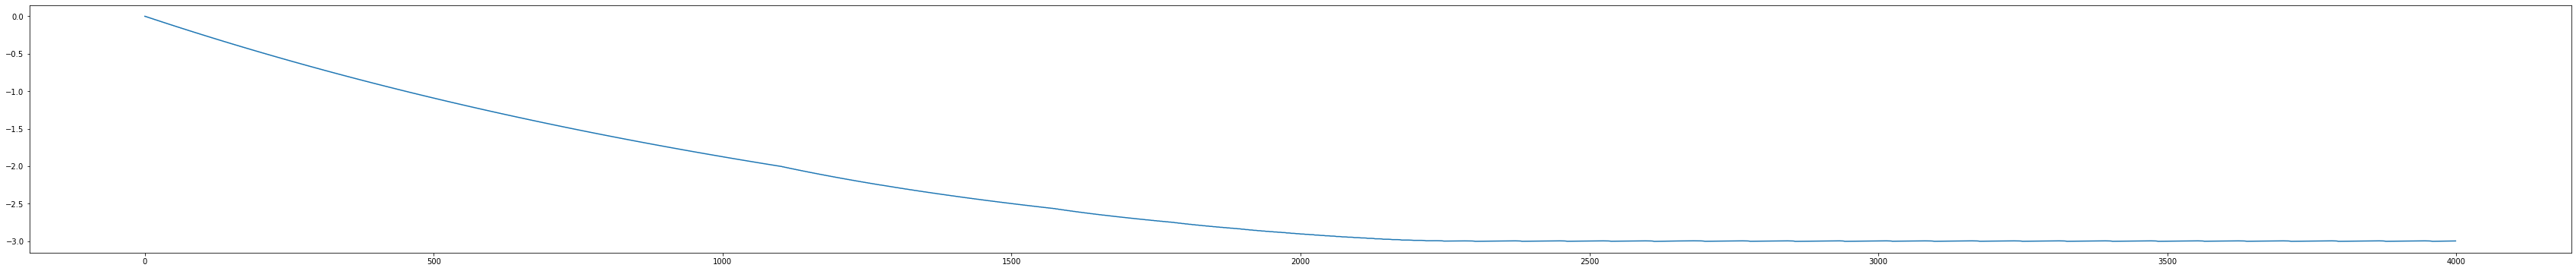

In [ ]:
#tonic spikes with alpha =4, sigma =0.01 and mu = 0.001
env = rulkovMap(N, alpha=4, sigma=0.01, mu=0.001)
for i in range(N-1):
    env.simulateStep(i)
plt.figure(figsize=(60, 6)) 
plt.plot(env.X.T)
plt.show()
plt.figure(figsize=(60, 6)) 
plt.plot(env.Y.T)
plt.show()

#tonic spikes with alpha=4.0, sigma=0.1 and mu=0.001
env = rulkovMap(N, alpha=4.0, sigma=0.1, mu=0.001)
for i in range(N-1):
    env.simulateStep(i)
plt.figure(figsize=(60, 6)) 
plt.plot(env.X.T)
plt.show()
plt.figure(figsize=(60, 6)) 
plt.plot(env.Y.T)
plt.show()


## References
* https://towardsdatascience.com/coding-a-2-layer-neural-network-from-scratch-in-python-4dd022d19fd2
* https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6
* https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/
* https://medium.com/@james_32022/frozen-lake-with-q-learning-4038b804abc1
* Discussed ideas and code with Aayush and Urbi.